# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        
    </li>
    <li> Here in response encoding you need to apply the <strong>laplase smoothing</strong> value for test set. Laplase smoothing means, If test point is present in test but not in train then you need to apply default 0.5 as probability value for that data point (Refer the Response Encoding Image from above cell) </li>
    <li>Please use atleast <strong> 35k </strong> data points </li></ul>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# Few Notes

1. Use atleast 35k data points
2. Use classifier.Predict_proba() method instead of predict() method while calculating roc_auc scores
3. Be sure that you are using laplase smoothing in response encoding function. Laplase smoothing means applying the default (0.5) value to test data if the test data is not present in the train set


In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('preprocessed_data.csv',nrows=35000)

In [4]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')
Neg = []
Pos = []
Nue = []
Comp = []

sia = SentimentIntensityAnalyzer()
for essay in data['essay'].values:
    k = sia.polarity_scores(essay)
    Neg.append(k['neg'])
    Nue.append(k['neu'])
    Pos.append(k['pos'])
    Comp.append(k['compound'])

data['Positive'] = Pos
data['Negetive'] = Neg
data['Nuetral'] = Nue
data['Compound'] = Comp

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [6]:
y = data['project_is_approved'].values
x = data.drop(['project_is_approved'],axis=1)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
x.head(1)

(24500, 12) (24500,)
(10500, 12) (10500,)


,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,Positive,Negetive,Nuetral,Compound
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.205,0.013,0.783,0.9867


In [7]:
def response_coding(x_train,y_train,feature):   
    classes = dict()
    unique_labels = x_train.loc[:,feature].unique()
    for label in unique_labels:
        total_points = x_train.loc[:,feature][x_train[feature] == label].count()
        class_0 = x_train.loc[:,feature][((x_train[feature] == label) & (y_train == 0))].count()
        class_1 = x_train.loc[:,feature][((x_train[feature] == label) & (y_train == 1))].count()
        classes[label] = [class_0/total_points,class_1/total_points]
    return classes    

<h2>1.3 Make Data Model Ready: encoding categorical features</h2>


In [8]:
cat_features = ['school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories']
for feature in cat_features:
    res_map = response_coding(X_train,y_train,feature)
    #print(res_map)
    lst = X_train.loc[:,feature]
    fea_0 = []
    fea_1 = []
    for cat in lst:
        fea_0.append(res_map.get(cat)[0])
        fea_1.append(res_map.get(cat)[1])
    class1 = feature+'_1'
    class0 = feature+'_0'
    X_train.drop([feature],axis=1,inplace=True)
    X_train[class0] = fea_0
    X_train[class1] = fea_1

    lst = X_test.loc[:,feature]
    fea_0 = []
    fea_1 = []
    for cat in lst:
        fea_0.append(res_map.get(cat,[0.5,0.5])[0])
        fea_1.append(res_map.get(cat,[0.5,0.5])[1])
    class1 = feature+'_1'
    class0 = feature+'_0'
    X_test.drop([feature],axis=1,inplace=True)
    X_test[class0] = fea_0
    X_test[class1] = fea_1
    # print(X_train.head())

C:\Users\gurus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\gurus\AppData\Local\Temp/ipykernel_19052/4290742560.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[class0] = fea_0
C:\Users\gurus\AppData\Local\Temp/ipykernel_19052/4290742560.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [9]:
X_train.head(2)

,teacher_number_of_previously_posted_projects,essay,price,Positive,Negetive,Nuetral,Compound,school_state_0,school_state_1,teacher_prefix_0,teacher_prefix_1,project_grade_category_0,project_grade_category_1,clean_categories_0,clean_categories_1,clean_subcategories_0,clean_subcategories_1
6068,1,my classroom diverse inclusion room full seven...,333.07,0.276,0.009,0.715,0.9901,0.182058,0.817942,0.15784,0.84216,0.152577,0.847423,0.191824,0.808176,0.190751,0.809249
6602,0,i first year teacher highland park classroom n...,221.84,0.276,0.016,0.708,0.9859,0.170960,0.829040,0.15784,0.84216,0.152577,0.847423,0.148557,0.851443,0.144756,0.855244


In [10]:
X_test.head(2)

,teacher_number_of_previously_posted_projects,essay,price,Positive,Negetive,Nuetral,Compound,school_state_0,school_state_1,teacher_prefix_0,teacher_prefix_1,project_grade_category_0,project_grade_category_1,clean_categories_0,clean_categories_1,clean_subcategories_0,clean_subcategories_1
9571,1,please help bring technology math classroom i ...,149.99,0.236,0.016,0.748,0.9792,0.162607,0.837393,0.14792,0.85208,0.165612,0.834388,0.18606,0.81394,0.198588,0.801412
5431,48,my classroom filled students love learn some l...,740.73,0.177,0.056,0.768,0.9684,0.187500,0.812500,0.14792,0.85208,0.149415,0.850585,0.14304,0.85696,0.167286,0.832714


In [11]:
X_train_resp_code = X_train.loc[:,"school_state_0":"clean_subcategories_1"]
X_train_resp_code = np.array(X_train_resp_code)
X_train_resp_code.shape

(24500, 10)

In [12]:
X_test_resp_code = X_test.loc[:,"school_state_0":"clean_subcategories_1"]
X_test_resp_code = np.array(X_test_resp_code)
X_test_resp_code.shape

(10500, 10)

<h2>1.4 Make Data Model Ready: encoding eassay, and project_title</h2>

In [13]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 

# Encoding of Essay using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=200)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf = vectorizer.transform(X_train['essay'].values)

X_test_tfidf = vectorizer.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)

After vectorizations
(24500, 1916) (24500,)
(10500, 1916) (10500,)


In [14]:
#please use below code to load glove vectors 
import pickle
from tqdm import tqdm
import os
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [15]:
# Apply TF-IDF W2V vectorization on 'Preprocessed_Essay' 
tfidf_model = TfidfVectorizer(min_df=100)
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

# Encoding of Essay using TF-IDF W2V
X_train_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_train['essay'].values: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v.append(vector)

X_train_tfidf_w2v = np.array(X_train_tfidf_w2v)
print(X_train_tfidf_w2v.shape)

X_test_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in X_test['essay']: # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v.append(vector)

X_test_tfidf_w2v = np.array(X_test_tfidf_w2v)
print(X_test_tfidf_w2v.shape)

(24500, 300)
(10500, 300)


In [16]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()

numeric = ['price','teacher_number_of_previously_posted_projects','Positive','Nuetral','Negetive','Compound']

scaler.fit(X_train[numeric])

X_train_numeric = scaler.transform(X_train[numeric])
X_test_numeric = scaler.transform(X_test[numeric])
print(X_train_numeric.shape)
print(X_test_numeric.shape)

(24500, 6)
(10500, 6)


In [17]:
from scipy.sparse import hstack
X_train1 = hstack((X_train_tfidf,X_train_resp_code,X_train_numeric)).tocsr()

X_test1 = hstack((X_test_tfidf,X_test_resp_code,X_test_numeric)).tocsr()

print("Shape final repesentation in set 1:")
print(X_train1.shape,y_train.shape)
print(X_test1.shape,y_test.shape)

Shape final repesentation in set 1:
(24500, 1932) (24500,)
(10500, 1932) (10500,)


In [18]:
# print(X_train_tfidf_w2v.shape)
# print(X_train_resp_code.shape)
# print(X_train_numeric.shape)
X_train2 = np.hstack((X_train_tfidf_w2v,X_train_resp_code,X_train_numeric))
X_test2 = np.hstack((X_test_tfidf_w2v,X_test_resp_code,X_test_numeric))

print("Shape final repesentation in set 2:")
print(X_train2.shape,y_train.shape)
print(X_test2.shape,y_test.shape)

Shape final repesentation in set 2:
(24500, 316) (24500,)
(10500, 316) (10500,)


In [19]:
X1 = ['TF-IDF']
X2 = ['TFIDF-W2V']

<h2>1.6 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()

param_grid = {'max_depth':[1, 2, 3, 4],'min_samples_split':[25, 50, 75, 100]}
cv1 = GridSearchCV(estimator=gb,param_grid=param_grid,scoring='roc_auc',cv = 5,n_jobs=-1)
cv1.fit(X_train1,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_split': [25, 50, 75, 100]},
             scoring='roc_auc')

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingClassifier()

param_grid = {'max_depth':[1, 3, 7 ,10],'min_samples_split':[10, 25, 75, 100]}
cv2 = GridSearchCV(estimator=gb,param_grid=param_grid,scoring='roc_auc',cv = 5,n_jobs=-1)
cv2.fit(X_train2,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 7, 10],
                         'min_samples_split': [10, 25, 75, 100]},
             scoring='roc_auc')

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

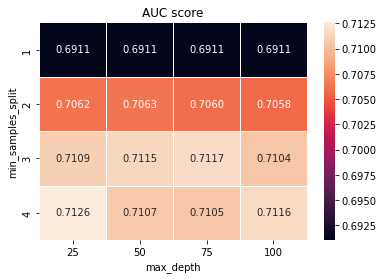

In [23]:
res = np.array(cv1.cv_results_['mean_test_score']).reshape(4,4)
grid = []
for i,depth in enumerate([1, 2, 3, 4]):
    for j,samples_split in enumerate([25, 50, 75, 100]):
        grid.append([depth,samples_split,res[i][j]])

df = pd.DataFrame(grid,columns=['max_depth','min_samples_split','mean_test_score'])
grid = df.pivot('max_depth','min_samples_split','mean_test_score')
ax = sns.heatmap(grid,annot=True,fmt="0.4f",linewidths=0.5)

plt.xlabel("max_depth")
plt.ylabel("min_samples_split")
plt.title("AUC score")
plt.show()


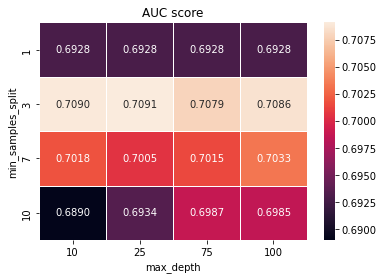

In [24]:
res = np.array(cv2.cv_results_['mean_test_score']).reshape(4,4)
grid = []
for i,depth in enumerate([1, 3, 7 ,10]):
    for j,samples_split in enumerate([10, 25, 75, 100]):
        grid.append([depth,samples_split,res[i][j]])

df = pd.DataFrame(grid,columns=['max_depth','min_samples_split','mean_test_score'])
grid = df.pivot('max_depth','min_samples_split','mean_test_score')
ax = sns.heatmap(grid,annot=True,fmt="0.4f",linewidths=0.5)

plt.xlabel("max_depth")
plt.ylabel("min_samples_split")
plt.title("AUC score")
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [26]:
X1.append(cv1.best_params_['max_depth'])
X1.append(cv1.best_params_['min_samples_split'])

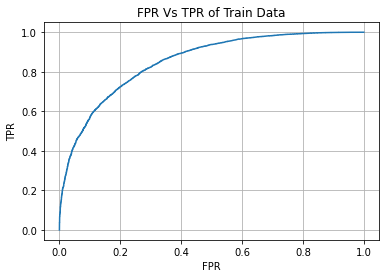

0.8522314009314922


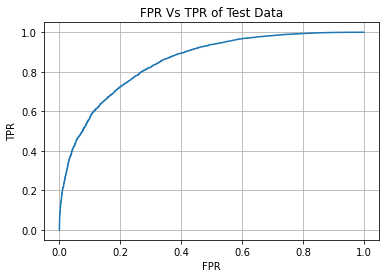

0.7035026936464971


In [27]:
gb = GradientBoostingClassifier(max_depth=cv1.best_params_['max_depth'],min_samples_split=cv1.best_params_['min_samples_split'])
gb.fit(X_train1,y_train)
pro_score_train = gb.predict_proba(X_train1)[:,1]
pro_score_test = gb.predict_proba(X_test1)[:,1]

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
k_train = roc_curve(y_train,pro_score_train)
plt.plot(k_train[0], k_train[1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR Vs TPR of Train Data")
plt.grid()
plt.show()
print(auc(k_train[0],k_train[1]))


k_test = roc_curve(y_test,pro_score_test)
plt.plot(k_train[0], k_train[1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR Vs TPR of Test Data")
plt.grid()
plt.show()
print(auc(k_test[0],k_test[1]))

In [28]:
X1.append(auc(k_train[0],k_train[1]))
X1.append(auc(k_test[0],k_test[1]))

the maximum value of tpr*(1-fpr) 0.5849084793491865 for threshold 0.821 



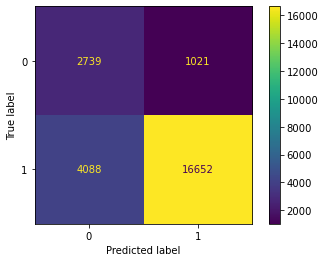

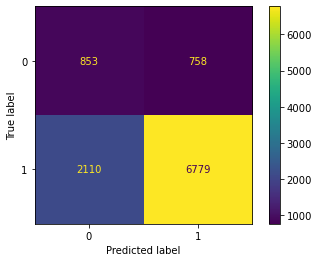

In [29]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
best_thr_index = np.argmax((k_train[1]*(1-k_train[0])))
threshold = k_train[2][best_thr_index]
print("="*100)
# (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
print("the maximum value of tpr*(1-fpr)", max((k_train[1]*(1-k_train[0]))), "for threshold", np.round(threshold,3),"\n")

# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

y_pred = []
FP_indices = [] #Indices of train datapoints which are False Positive
for i,prob in enumerate(pro_score_train):
    if prob > threshold:
        y_pred.append(1)
        if y_train[i] == 0:
            FP_indices.append(i)
    else:
        y_pred.append(0)

ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred)).plot()

y_pred = []
for prob in pro_score_test:
    if prob > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)


ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [30]:
X2.append(cv2.best_params_['max_depth'])
X2.append(cv2.best_params_['min_samples_split'])

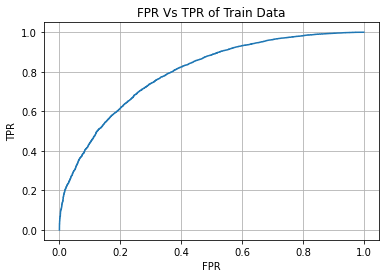

0.7972376715771763


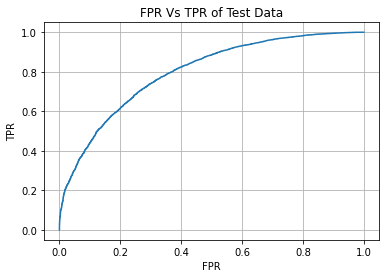

0.6898578921394768


In [31]:
gb = GradientBoostingClassifier(max_depth=cv2.best_params_['max_depth'],min_samples_split=cv2.best_params_['min_samples_split'])
gb.fit(X_train2,y_train)
pro_score_train = gb.predict_proba(X_train2)[:,1]
pro_score_test = gb.predict_proba(X_test2)[:,1]

# Plot the ROC-AUC curves using the probability predictions made on train and test data.
k_train = roc_curve(y_train,pro_score_train)
plt.plot(k_train[0], k_train[1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR Vs TPR of Train Data")
plt.grid()
plt.show()
print(auc(k_train[0],k_train[1]))


k_test = roc_curve(y_test,pro_score_test)
plt.plot(k_train[0], k_train[1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("FPR Vs TPR of Test Data")
plt.grid()
plt.show()
print(auc(k_test[0],k_test[1]))

In [32]:
X2.append(auc(k_train[0],k_train[1]))
X2.append(auc(k_test[0],k_test[1]))

the maximum value of tpr*(1-fpr) 0.5196531525062065 for threshold 0.831 



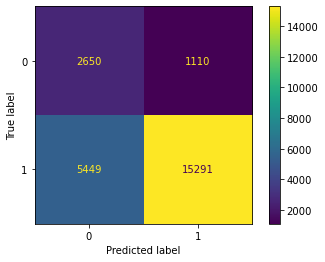

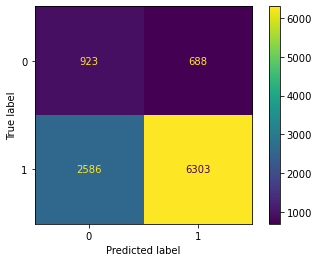

In [33]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
best_thr_index = np.argmax((k_train[1]*(1-k_train[0])))
threshold = k_train[2][best_thr_index]
print("="*100)
# (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
print("the maximum value of tpr*(1-fpr)", max((k_train[1]*(1-k_train[0]))), "for threshold", np.round(threshold,3),"\n")

# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.

y_pred = []
FP_indices = [] #Indices of train datapoints which are False Positive
for i,prob in enumerate(pro_score_train):
    if prob > threshold:
        y_pred.append(1)
        if y_train[i] == 0:
            FP_indices.append(i)
    else:
        y_pred.append(0)

ConfusionMatrixDisplay(confusion_matrix(y_train, y_pred)).plot()

y_pred = []
for prob in pro_score_test:
    if prob > threshold:
        y_pred.append(1)
    else:
        y_pred.append(0)


ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [34]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ['Model',"max_depth","min_samples_split",'Train ROC-AUC','Test ROC-AUC']
x.add_row(X1)
x.add_row(X2)

In [35]:
print(x)

+-----------+-----------+-------------------+--------------------+--------------------+
|   Model   | max_depth | min_samples_split |   Train ROC-AUC    |    Test ROC-AUC    |
+-----------+-----------+-------------------+--------------------+--------------------+
|   TF-IDF  |     4     |         25        | 0.8522314009314922 | 0.7035026936464971 |
| TFIDF-W2V |     3     |         25        | 0.7972376715771763 | 0.6898578921394768 |
+-----------+-----------+-------------------+--------------------+--------------------+


* As we can see TF - IDF model and TFIDF - W2V model both giving almost giving same test score
* But In TFIDF - W2V ,We are just using the 316 dimesional data and max_depth of tree is also 3 (Which is less compared to TF-IDF model)
* We can clearly say TFIDF-W2V is more efficient than TF-IDF Model